# Figures for the giant number fluctuations project (DF) - Supplemental

## General guidelines

- This notebook contains finalized code for making the figures in the giant number fluctuations paper. This notebook contains code for two purposes:
    - summarizing code: summarizes batch data into a more condensed form
    - plotting: read data from data_summary spreadsheet, and plot the data (the sheet should locate in Google Drive\corresponding research project folder\data\data_summary.xlsx).
- Figure organization
    - Figures will be organized under corresponding sections (h2 title). 
    - Subfigures (panels) will be under subsections (h3 title). 
    - Each subsection should be self-complete, meaning that to plot a certain figure, only the code in that specific section needs to be run, except importing packages (which should always be the first thing to run when starting the notebook.
- Ideas and plans that haven't been implemented should be listed in the **Plans** block, in <font color='blue'>blue color</font>.
- While notebooks for each specific figure is still kept in this directory, they are used mainly for drafting figures, testing code and trying out ideas. Once a figure is finalized, copy the corresponding code to this notebook.

## <font color='blue'> Plans

<font color='blue'>
    
- ...
</font>

## Table of content
1. GNF calculation
    - (a) subsystems of varying sizes
    - (b) multiple seeds for spatial average
2. Autocorrelation
    - (a) density (intensity)
    - (b) velocity
3. Does image contrast matter?
    - (a) low and high contrast images
    - (b) number fluctuations
4. The effect of illumination intensity fluctuations

## 0 Packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from skimage import io
from corr_utils import *
import typesetting.main as tm
tm.prl()
from corrLib import *
import matplotlib as mpl

## 1 GNF calculations
### 1.1 subsystems of varying sizes

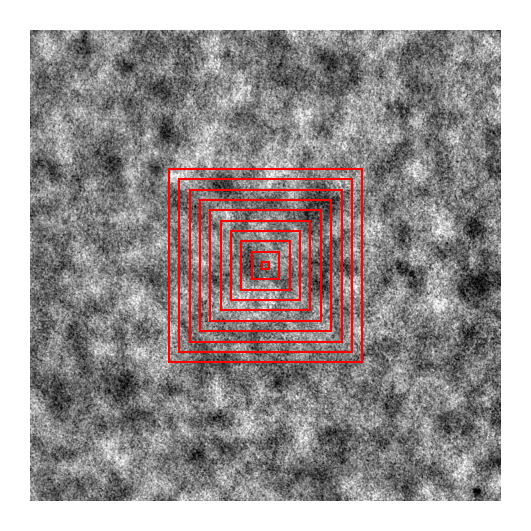

In [19]:
img = io.imread(r'E:\Google Drive\Research projects\DF\Figures\experiment\raw\80-900.tif')
h, w = img.shape
wf = 1.57
hf = h / w * wf
fig = plt.figure(figsize=(hf, wf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.axis('off')

center = (1024, 1024)
for size in range(30, 900, 90):
    xy = (center[0]-size/2, center[1]-size/2)
    rect = mpatch.Rectangle(xy, size, size, facecolor=(0,0,0,0), edgecolor='red', lw=0.5)
    ax.add_patch(rect)

fig.savefig(r'E:\Google Drive\Research projects\DF\Figures\technical-details\GNF-calculation\varying-subsystem-size.pdf')

### 1.2 multiple seeds for spatial average


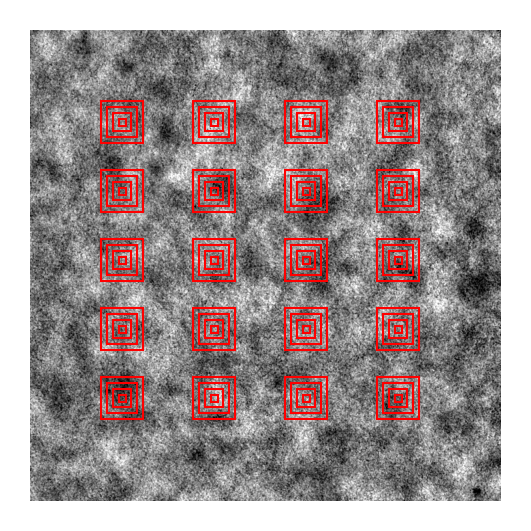

In [23]:
img = io.imread(r'E:\Google Drive\Research projects\DF\Figures\experiment\raw\80-900.tif')
h, w = img.shape
wf = 1.57
hf = h / w * wf
fig = plt.figure(figsize=(hf, wf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.axis('off')

x = np.linspace(400, 1600, 4)
y = np.linspace(400, 1600, 5)
X, Y = np.meshgrid(x, y)

for i, j in zip(X.flatten(), Y.flatten()):
    center = (i, j)
    for size in range(30, 200, 50):
        xy = (center[0]-size/2, center[1]-size/2)
        rect = mpatch.Rectangle(xy, size, size, facecolor=(0,0,0,0), edgecolor='red', lw=0.5)
        ax.add_patch(rect)
fig.savefig(r'E:\Google Drive\Research projects\DF\Figures\technical-details\GNF-calculation\multiple-seeds-of-subsystems.pdf')

## 2 Autocorrelation
### (a) Density (intensity)

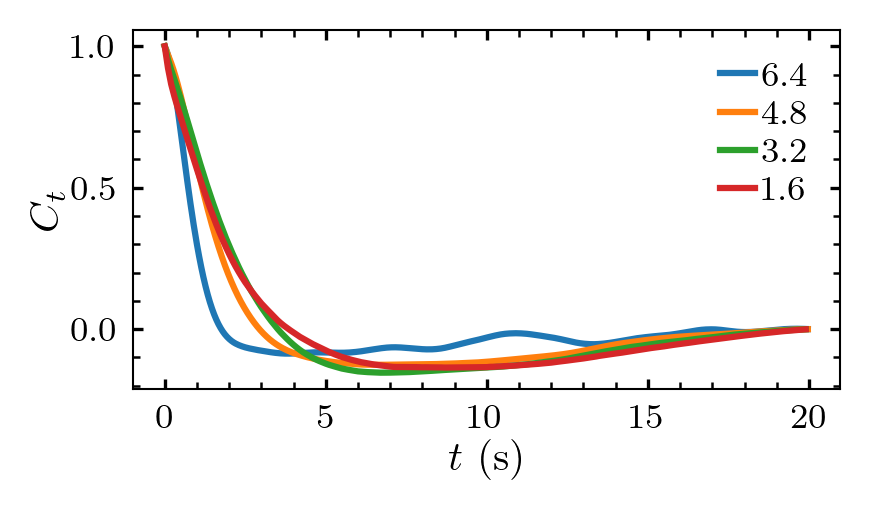

In [3]:
fig, ax = plt.subplots(figsize=(3, 1.8), dpi=300)
num_list = [1, 4, 7, 10]
range_list = [(3000, 3600), (3000, 3600), (1600, 1800), (1600, 1800)]
fps_list = [30, 30, 10, 10]
phi_list = [6.4, 4.8, 3.2, 1.6]
for n, r, fps, phi in zip(num_list, range_list, fps_list, phi_list):
    folder =r'E:\moreData\08032020\small_imseq\{:02d}'.format(n)
    stack = np.load(os.path.join(folder, 'stack.npy'))[r[0]: r[1]]
    ac = autocorr_imseq(stack)
    t = np.arange(0, len(ac)) / fps
    ax.plot(t, ac, label='{:.1f}'.format(phi))
ax.set_xlabel('$t$ (s)')
ax.set_ylabel('$C_t$')
ax.legend()

plt.tight_layout()

# fig.savefig(r'C:\Users\liux3141\Google Drive\Research projects\DF\Figures\technical-details\density-autocorrelation\density-autocorrelation.pdf')

### (b) Velocity 

## Does image contrast matter?
### (a) low and high contrast images

(-0.5, 399.5, 335.5, -0.5)

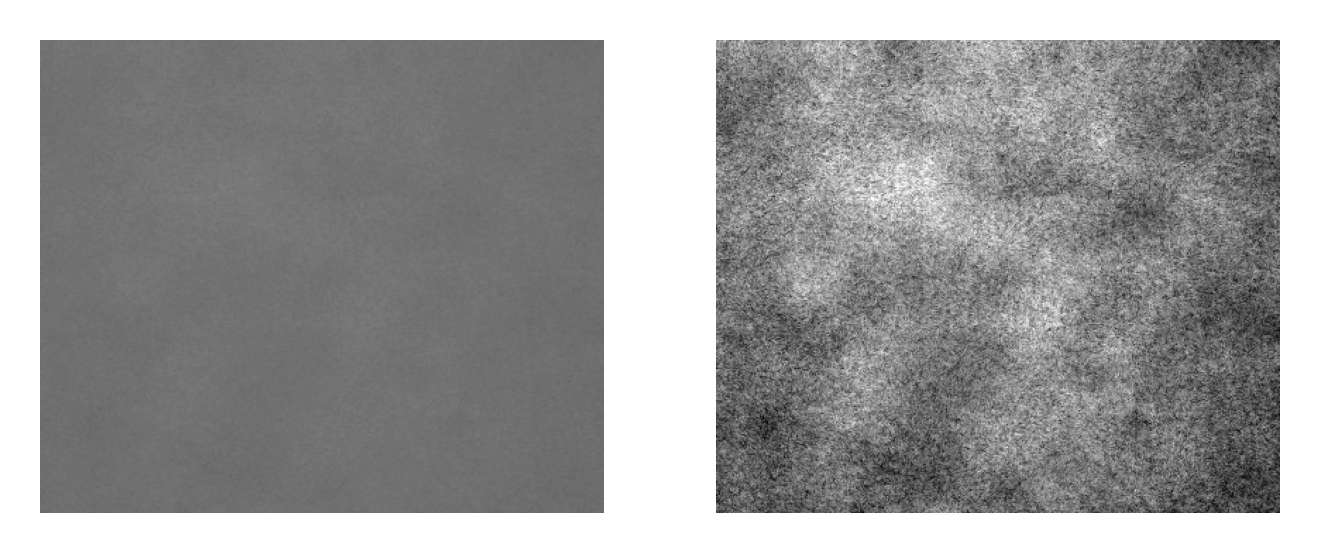

In [11]:
low = io.imread(r'temp_data\raw.jpg', as_gray=True)
high = io.imread(r'temp_data\auto.jpg', as_gray=True)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4, 2))
ax[0].imshow(low, cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[1].imshow(high, cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')

### (b) number fluctuations

In [15]:
def down_size_imseq(folder, windowsize=[50, 50], step=25):
    """
    Downsizing an image sequence of k images in given folder and save them as an numpy array of size k*m*n, 
    where m and n are the downsized dimension of each image. 
    
    Args:
    folder -- folder of image sequence
    windowsize -- parameter of corrLib.divide_windows(), pixel
    step -- parameter of corrLib.divide_windows(), pixel
    
    Returns:
    stack -- numpy array of size k*m*n
    """
    
    l = corrLib.readseq(folder)
    I_list = []
    for num, i in l.iterrows():
        img = io.imread(i.Dir)
        X, Y, I = corrLib.divide_windows(img, windowsize=windowsize, step=step)
        I_list.append(I)
    stack = np.stack(I_list, axis=0)
    
    return stack

In [17]:
raw_folder = r'E:\moreData\test_contrast\raw'
auto_folder = r'E:\moreData\test_contrast\auto'
raw_stack = down_size_imseq(raw_folder)
auto_stack = down_size_imseq(auto_folder)
raw = df2(raw_stack)
auto = df2(auto_stack)
x_raw, y_raw = postprocess_gnf(raw, 3, xlim=100)
x_auto, y_auto = postprocess_gnf(auto, 3, xlim=100)

Text(0, 0.5, ' $\\Delta N/\\sqrt N$')

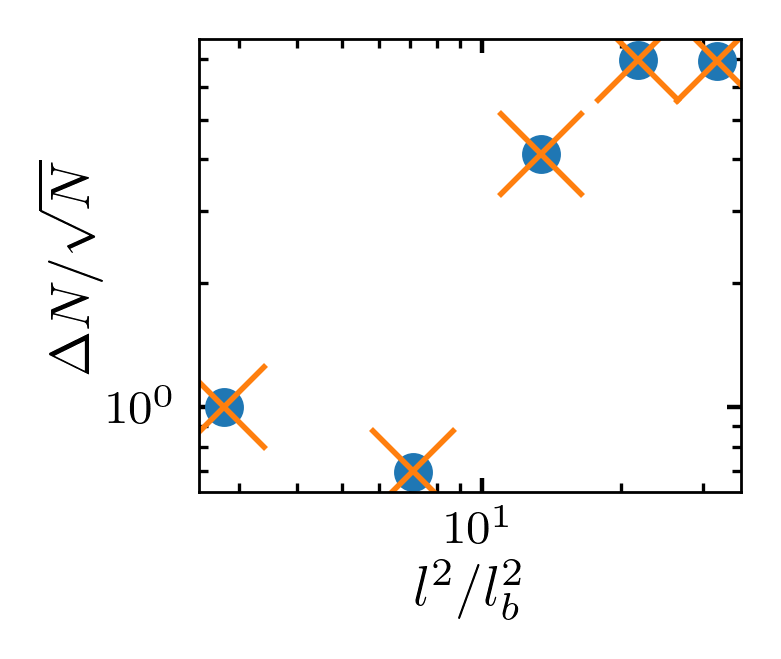

In [18]:
fig, ax = plt.subplots()
ax.plot(x_raw, y_raw, marker='o', ls='', label='raw')
ax.plot(x_auto, y_auto, marker='x', markersize=15, ls='', label='auto')
ax.loglog()
ax.set_xlabel('$l^2/l_b^2$')
ax.set_ylabel(' $\Delta N/\sqrt N$')
# xf, yf, xt, yt, slope = label_slope(x_raw, y_raw, location='n')
# plt.plot(xf, yf, ls='--', color='black')
# plt.text(xt, yt, '{:.2f}'.format(slope))

<font color='green'>**Comment:** image contrast does not matter. </font>

## 3 The effect of illumination intensity fluctuations

The intensity of illumination light always fluctuates with a relatively small amplitude. This fluctuation is usually negligible when imaging samples which changes more dramatically than this fluctuation. However, when imaging a static sample, such as a "blank" sample, this fluctuation can be easily captured. In the GNF study, the variance of image intensity over time is calculated at gradually increasing length scales. When this fluctuation dominates the image intensity variation, the scaling of variance on length scale is anomalously large. Here, we simulate a competition between illumination fluctuations and sample intrinsic variations and examine the effect of illumination fluctuations.

### 3.1 The simulation system

A (100, 100, 100) box filled with random number. And a (100,) random array as illumination fluctuations adding to the box.

In [ ]:
### !!! This block is extremely slow. Do not run. The result was previously obtained and can be read from a file.
num_frames, h, w = 100, 100, 100
amp_iL = range(1, 101)
amp_nL = range(1, 101)
alpha = np.zeros((len(amp_iL), len(amp_nL)))
for i, amp_i in enumerate(amp_iL):
    for j, amp_n in enumerate(amp_nL):
        imgstack = np.random.randint(-amp_i, amp_i, (num_frames, h, w))
        noise = np.random.randint(-amp_n, amp_n, (num_frames, 1, 1))
        imgstack_add_n = imgstack + noise
        gnf = df2(imgstack_add_n)
        x = gnf.n / 100
        y = gnf.d / x ** 0.5
        y = y / y.iat[0]
        xf, yf, xt, yt, slope = label_slope(x, y)
        alpha[i, j] = slope
        print('amp_i = {0}, amp_n = {1}: alpha = {2}'.format(amp_i, amp_n, slope))

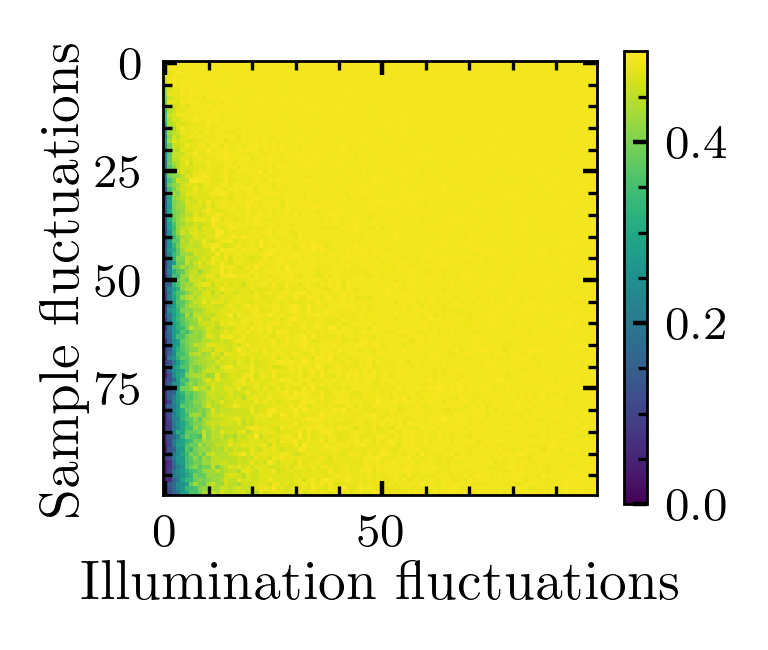

In [26]:
alpha = np.loadtxt('temp_data/background_light_noise_alpha.txt')
fig, ax = plt.subplots()
ax.imshow(alpha)
ax.set_xlabel('Illumination fluctuations')
ax.set_ylabel('Sample fluctuations')
mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=0.5), cmap='viridis')
plt.colorbar(mappable=mappable, ax=ax)

<font color='green'>**Comment:** only when the sample intrinsic fluctuations is sufficiently large, the GNF can be brought down. When illumination fluctuations dominate, GNF is always saturated to be 0.5.

In the plot above, towards the right, all the curves show a trend of slowing down of the rate of increase (except 0, for the fluctuations of illumination dominates). This slowing-down happens at different length scales. For 80 n0 curve, it happens around 100. The same scale applies to 50, 60, 70 n0, (and 40 n0 more or less), the collective motion concentrations. It seems that the range \[1, 100\] is a good choice of fitting range. And indeed, in the old data, all curve fittings were done in this range, as indicated by the gray dashed line in the picture below. 

<img src='temp_data\gnf_raw.JPG' width='500' >

However, we notice that for low concentration the range \[1, 100\] no longer reflects the initial constant increasing, but rather a combination of increase and plateau. Thus, the slope obtained from fitting such a range results in meaningless values. In the picture, I point out the slowing-down point for low concentration curves. They are around 2 to 3 times of bacterial body size, indicating a very weak correlation at these concentrations. Fitting such curves in range \[1, 100\] will for sure give very small slopes, of which the meanings are unclear.

This ill-defined fitting is best illustrated by the concentration 0. The increase was initially very small, which is consistent with intuition. When watch window gets sufficiently large, the slope ramps up to almost 0.5, the maximum possible value. This strange behavior is a result of the natural fluctuations of the illumination light source. Within a small range, the spatial variation of image can compete with light fluctuations. When watch window gets larger, since this is blank sample, no significant spatial variation can be introduced, so that it can no longer catch up with the overall temporal variation imposed by light. As a result, the variation shoots up. 

In addition, I want to explain more on why illumination light fluctuations can produce such large slope when watch window is large. The intuition is that, when I examine local concentrations of particles in a sample, some of them increase while others decrease. This is true, as long as the sample conserves number of particles. The so called giant number fluctuations, describe a scenario, where I look at the concentration at one point and it increases, then if I sample more area around this point, I will find the increase is still there, as if I was still looking at the point. In a randomly fluctuating system, when sampling larger and larger area, the fluctuation of one point would be averaged out by the fluctuations at other points, so that the fluctuations in a big area will eventually be negligible, compared to the size of the whole system. Now imagine, in an set of images, dominated by a spatially homogeneous, but temporally fluctuating light source, when sampling bigger and bigger area, the variance of the total pixel intensity, will always increase with the area linearly, because each single pixel exhibits exactly the same fluctuations. That is to say, $\Delta N \sim \langle N \rangle$. 

So the fluctuations of light source always exists, why in high concentration samples it does not give rise to this strange behavior of the curves? This has to be understood by realizing that it's the ratio between the fluctuations of the light source (spatially uniform, temporal fluctuating) and the intrinsic temporal fluctuations together, which determines the fluctuations of the whole system. The picture below shows how external overall fluctuations and intrinsic fluctuations together influence the number fluctuations strength $\alpha$. When noise (the intrinsic fluctuations) dominates, $\alpha$ (coded by color) is small (original image is generated by uniformly distributed random numbers). When light (external overall fluctuations) dominates, $\alpha$ tends to 0.5.

<img src='temp_data\light_noise.JPG' width='500'>

Now we realize that, low concentration samples have different length scales where a curve fitting is still meaningful. I believe the length would be either the concentration correlation length, or the velocity correlation length. Next, we will rescale the x-axis of the plot above by both quantities.